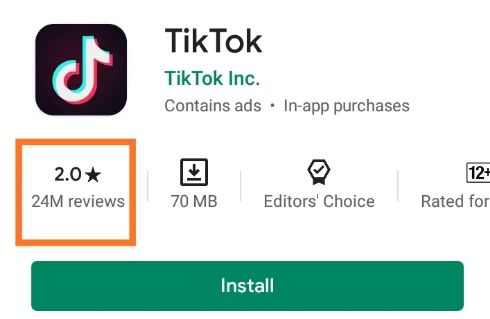

# **TikTok's growth**

TikTok has experienced remarkable growth, reaching over 1.5 billion monthly active users (MAUs) by 2023, driven largely by its appeal to younger audiences, particularly Gen Z. The platform surpassed 1 billion MAUs in 2021, just a few years after its global launch, and consistently ranks as one of the most downloaded apps worldwide, with over 3 billion total downloads.

In comparison to other major social media platforms, TikTok’s growth outpaces Instagram's 2 billion MAUs, especially in short-form video content, despite Instagram’s introduction of Reels to compete. While Facebook remains the largest social media platform with 2.9 billion MAUs, its growth has slowed among younger users, who have flocked to TikTok. YouTube still dominates long-form video content with 2.5 billion MAUs but is also responding to TikTok’s rise with YouTube Shorts.

TikTok’s rapid ascent has positioned it as a formidable competitor in the social media landscape, outshining platforms like Snapchat and Twitter (X) in user growth and engagement.


# Analysing TikTok's review on Google Play Store

Let us analyze sentiments expressed in user reviews for TikTok on Google Play. Understanding user sentiments can offer valuable insights into how the app is perceived, what aspects users enjoy, and what improvements they expect. Given the large dataset of user reviews, I decided to use Python to process the data efficiently and analyze it.

The first step in the process was importing necessary Python libraries. I utilized libraries such as pandas for data manipulation, matplotlib for visualizations, and nltk for sentiment analysis. Additionally, I included WordCloud to create a visual representation of frequently occurring words in the reviews. These libraries are powerful tools for conducting data analysis and visualizing patterns in textual data.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

# Attempting to read the CSV with different strategies for error handling
try:
    # First, try reading the CSV normally
    data = pd.read_csv("tiktok_google_play_reviews.csv", sep=',')
except pd.errors.ParserError as e:
    # Print error details for debugging
    print(f"ParserError: {e}")

    # Try skipping problematic lines
    print("Trying to skip bad lines...")
    data = pd.read_csv("tiktok_google_play_reviews.csv", on_bad_lines='skip', sep=',')

# Inspect the first few rows to ensure data is loaded properly
print(data.head())

# Continue with other analysis or visualizations as needed



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-8-b7b2caeec4fd>:15: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tiktok_google_play_reviews.csv", sep=',')


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

The first part of the code sets up the libraries required for sentiment analysis. Specifically, I imported the nltk library to handle natural language processing (NLP) tasks, such as sentiment analysis, and to download common stopwords that help filter out irrelevant words (e.g., “and,” “the”). I also initialized a stemmer to reduce words to their base form, which improves the accuracy of text processing.

The next step is to load the data containing the users reviews into a pandas DataFrame. However, given that large datasets can sometimes have formatting issues, I needed to account for potential errors during the data loading process.

Here, I’m trying to read the CSV file using the pandas library. In case of any issues, such as inconsistent row formatting, the code catches the error using a try-except block. If a ParserError is encountered, the code prints out the error for debugging and retries reading the file, this time skipping any problematic rows (on_bad_lines='skip'). This ensures that my workflow is not interrupted by a few corrupted entries in the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460256 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


In [10]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


After successfully reading the file, I print the first few rows of the dataset to verify that the data has been loaded correctly. The data.head() function allows me to inspect the top rows and confirm that all relevant columns (such as reviewId, userName, content, score, and at) are present.

The output confirms that the data has been loaded successfully. It displays information such as the review content, user rating (score), and the time the review was created (at). Some fields, like replyContent and repliedAt, contain missing values, which I’ll need to handle later in the analysis. The variety in ratings (e.g., 5.0 and 1.0) suggests that the dataset contains a mix of positive and negative sentiments, which is important for sentiment analysis.

In [12]:
data = data[["content","score"]]
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


With the data successfully loaded, I’ll proceed to clean the text data and perform sentiment analysis. This involves preprocessing the text (e.g., removing stopwords, punctuation) and applying the VADER sentiment analyzer to understand the overall tone of the reviews. By visualizing sentiment distribution, I aim to reveal trends that might inform how users perceive TikTok’s features.

# Handling Missing Values

One of the first things to check in any dataset is whether there are any missing values. Missing data can skew analysis results, so it’s important to identify and handle it appropriately. By checking for missing values, I aim to ensure that no null values impact the text processing and sentiment analysis steps.

In [13]:
print(data.isnull().sum())

content    31
score       0
dtype: int64


The output shows that there are 15 missing entries in the "content" column (which stores the user reviews) and 1 missing entry in the "score" column (which stores the ratings). Since these are crucial columns for sentiment analysis, I’ll need to handle these missing values before proceeding.

In [14]:
data = data.dropna()

To clean up the data, I decided to remove any rows that contain missing values using the .dropna() method. This step is crucial to ensure that all rows analyzed contain both a review and a score.

In [15]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


# Text Preprocessing

After addressing the missing data, the next step is text cleaning and preprocessing. Reviews often contain noise such as special characters, punctuation, URLs, and stopwords, which don't add value to sentiment analysis. Preprocessing the text ensures that only the most meaningful information remains for analysis.

In [16]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

In [17]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

I implemented a clean function to process the text data. Here's what each part does:

*   Converts the review text to lowercase for uniformity.
*   Removes unnecessary elements such as square-bracketed text, URLs, HTML tags, punctuation, and digits.
*   Filters out common stopwords like "and," "the," and "is," which don't contribute much meaning to the sentiment.
*   Applies stemming to reduce words to their root form (e.g., "playing" becomes "play"), which improves the consistency of the words in the analysis.





# Visualizing Ratings Distribution

Understanding how users rate TikTok can provide a high-level view of user satisfaction. To visualize this, I decided to create a pie chart showing the distribution of user ratings (1 to 5 stars). This will help me understand the general trends in user feedback, such as whether users are mostly satisfied or dissatisfied.

In [19]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

Here’s what the code does:

First, I calculated the frequency of each score (rating) using the .value_counts() method.

Then, I created a pie chart using plotly.express, a visualization library that makes interactive charts easy to generate.
I used the hole=0.5 argument to create a donut chart, which enhances the clarity of the visualization.

The chart shows that 73.6% of users gave a 5 star rating for the TikTok app. This is followed by 13.5% of users who gave a 1 star rating for the app. Around 13% of users gave a 2 to 4 stars rating.

# Word Cloud Generation for General Review Content

In this phase of the project, my goal is to dig deeper into the sentiment expressed in the TikTok reviews by generating visual representations (WordClouds) and calculating sentiment scores. These steps will help provide both a qualitative and quantitative understanding of user feedback. I begin by visualizing common words in the reviews and proceed to use sentiment analysis to quantify how positive, negative, or neutral the reviews are.

After cleaning the text data, I wanted to understand the most frequent words used in the reviews. A WordCloud provides a visual representation where frequently used words appear larger, giving a sense of what users are generally talking about. By excluding common stopwords (like "the," "and," etc.), I ensure that only meaningful words are highlighted.

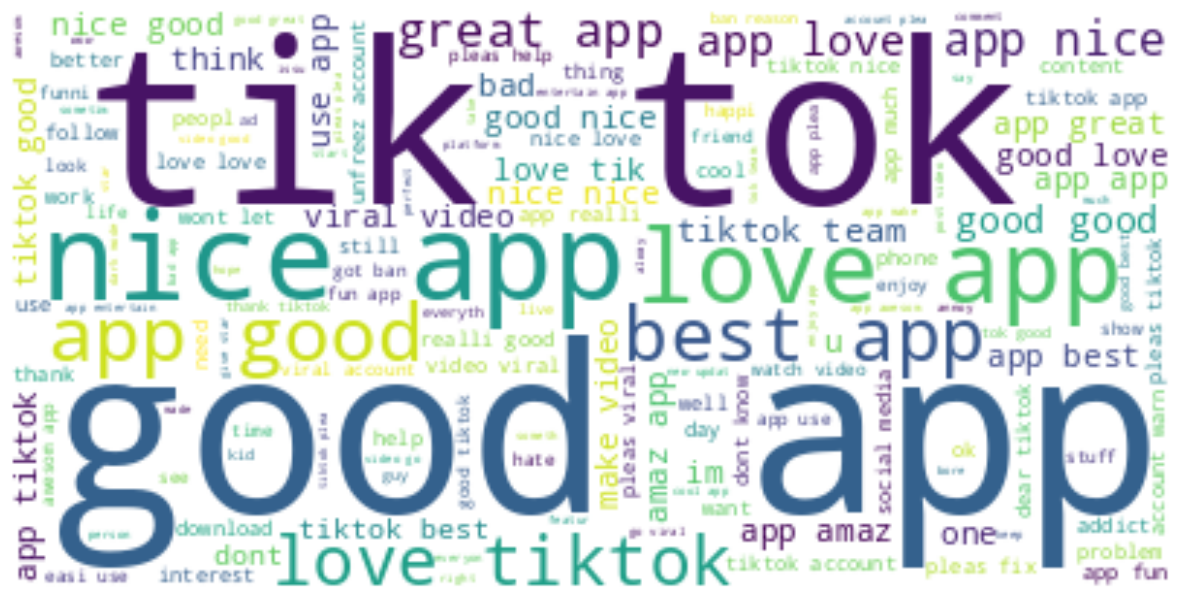

In [20]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The WordCloud will display the most frequently occurring words in TikTok's reviews. We see the most common words being 'love', 'good', 'video' and 'app' which generally indicates positive reviews for the app.

# Sentiment Analysis Using VADER

Now that I’ve visualized the common words, the next step is to quantify user sentiment in a more structured way. Using VADER (Valence Aware Dictionary and sEntiment Reasoner), I can calculate sentiment scores for each review, allowing me to categorize them into positive, negative, and neutral sentiments. VADER is well-suited for social media-like content, making it ideal for this project.

By quantifying the sentiment of each review, I can better understand the general mood of users toward TikTok. Are most reviews positive, or are there significant negative feelings? This step provides the foundation for further analysis, including separating positive and negative reviews.

The printed output shows the sentiment scores for each review:

In [21]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


# Visualizing Positive and Negative Reviews via Word Clouds

Now that I’ve calculated sentiment scores, I want to separately visualize the most common words in positive and negative reviews. This will provide a clearer picture of what users like and dislike about TikTok.

I filtered the dataset to include only reviews with a higher positive score than a negative score. I then generated a WordCloud based on the filtered positive reviews and visualized it using matplotlib.

By focusing on positive reviews, I can visualize the key aspects that users appreciate about TikTok. This helps identify what TikTok is doing well.

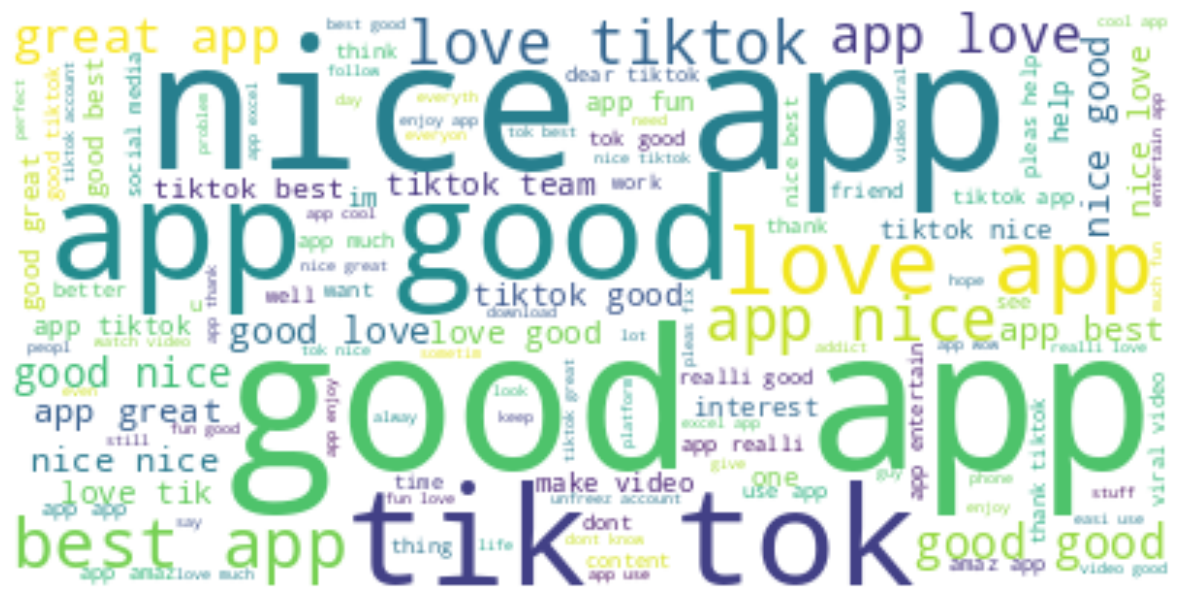

In [22]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Similarly, I filtered for reviews where the negative sentiment is higher than the positive sentiment, generated a WordCloud, and visualized the result.

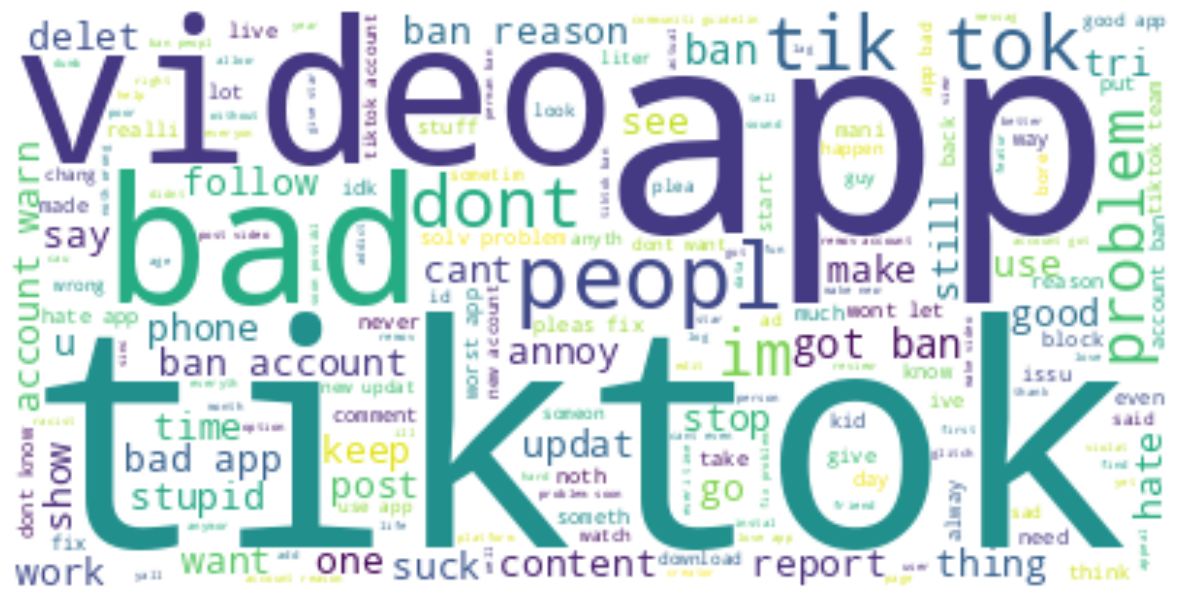

In [23]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Summarizing Sentiment Counts

At this stage of my TikTok review sentiment analysis project, I wanted to summarize the overall sentiment present in the reviews. To do this, I calculated the sum of the positive, negative, and neutral scores of all reviews, which gives an aggregate sentiment score for each category. By determining which sentiment score is highest, I can make an informed judgment on the overall tone of user reviews for TikTok on the Google Play Store. The code also prints each sentiment's total value for further understanding.

In [24]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
  if (a>b) and (a>c):
    print("Positive 😊 ")
  elif (b>a) and (b>c):
    print("Negative ☹️ ")
  else:
    print("Neutral 😐 ")
sentiment_score(x, y, z)

Neutral 😐 


In [25]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  199770.6259999934
Negative:  17446.56100000019
Neutral:  234567.13800002288


The total sentiment scores reveal that the neutral sentiment is significantly higher than the positive or negative scores, supporting the earlier classification of the overall sentiment as neutral. Interestingly, positive sentiment is also quite high, indicating that many users appreciate TikTok. However, the relatively low negative score suggests that while there are some criticisms, they are not overwhelmingly prevalent in the data. This sentiment analysis provides valuable insights into user perception, showing a balanced view but skewing slightly more toward neutral opinions.

By identifying and interpreting these sentiment trends, TikTok can better understand how users feel about their app, and focus on areas of improvement or further enhancement based on user feedback.